# <p style='text-align: center;'>GOPH 419 Computational Methods for Geophysicists : Lab 3 </p>

## <p style='text-align: center;'>Cole Narfason & Fazlie Latib</p>

## Abstract

<p style='text-align: justify;'>The objective of this lab is to perform least squares regression analysis by creating and solving a linear system of equations. Python code will then be used to analyze a Gutenberg-Richter Law application for monitoring earthquake frequency at an industrial operation. Due to advancements in horizontal drilling technology, hydrocarbon reservoirs that were routinely drilled through to reach other formations with much higher permeability are now being revisited. By drilling a horizontal well and fracking the rock surrounding its lateral, this artificially increases the permeability of the reservoir and enables hydrocarbons to flow into and up the wellbore. However, this increase in pressure can cause induced seismicity as faults close to the well that are just about to slip, now do slip with the increased pressure. This risk of induced seismicity is often overlooked but is important to monitor while exploiting these new unconventional reservoirs. Using linear least squares, best-fit curves were fitted to the data and plotted. It appeared that large injection rate increases corresponded to high b values and low injection rate slope values corresponded to lower b values. This could explain noticable trends in the dataset where injection rates changed in the study area. Before analyzing the data, Gutenberg-Richter Law equation was linearized so that the least squares regression function built, multi_regress() can be utilized properly. The time series data was plotted and the time intervals of data that were analyzed were chosen based-upon apparent trends in the number of earthquake occurences where approximately 4 different intervals could be distinguished. The first interval is between 0 to 34 hours and the a and b values was found to be 2.70 and 2.10 respectively. The second interval is between 34 to 46 hours and the a and b values was found to be 2.08 and 1.74 respectively. The third interval is between 46 to 72 hours and the a and b values was found to be 2.35 and 1.74 respectively. The last interval is between 72 to 120 hours and the a and b values was found to be 2.77 and 1.97 respectively.</p>

In [1]:
# show picture of horizontal well at surface
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://www.bu.edu/files/2020/12/Resize-iStock-1161946927.jpg")

## Background and Theory

### Curve Fitting:

In engineering and science we often encounter data given as discrete values along a continuum. It is often necessary to estimate the values between the given discrete values and curve fitting can help solve the problem. Curve fitting may also provide a mean to simplify a complicated relationship between variables. 

There are several approaches for fitting curves to the data. This includes interpolation which can be especially useful if the data is very precise and it is reasonable to pass a curve through all the data points. Fourier analysis is another approach which is useful when the data is known to be periodic in nature and it is desirable to obtain its frequency components (e.g. wave data). In this lab we will be using one of the most common methods which is referred to as **Least Squares Regression** (Karchewski 2021).

### General Linear Least Squares Regression (GLLS):

GLLS is essentially a methodology for developing a linear system of equations. We assume we can write our model in the form:

$ y =f(x,a) = a_1x_1 + a_2x_2 + ... + a_{n}x_n $

where y is a scalar dependent variable, f is the model function, x is a vector of independent variables and a is a vector of the model parameters. This assumption may seem bold but many models in science and engineering can be written in this form or linearized to produce it. We want to determine the 'a' coefficients of the equation in a way that somehow minimizes the error in the model. With GLLS we do this by **minimizing the sum of squared residuals** about the fitted curve (recall: a residual is the difference between the original data value and the value that the fitted curve would produce for the same independent x value). This works well because it produces a **unique solution and counts positive and negative error equally. It also does not weigh outliers too heavily** (Karchewski 2021). 

The equations used to build the least square regression function are shown below. Z is the matrix of the independent variable data and y is the vector of the dependent variable data. [A] is the coefficient matrix and {Y} is the right-hand side vector for the least squares regression and both of them will be used to calculate and form {a}, the vector containing the unknown coefficients in the model. Using [Z] and {a}, we can estimate the model dependent variable data, {ym}. 

$ \Large [A] = [Z]^T [Z] $

$ \Large \{Y\} = [Z]^T \{y\} $

$ \Large \{a\} = [A]^{-1} \{Y\} $

$ \Large \{y_m\} = [Z] \{a\} $

The quality of fit produced by the newly solved for 'a' coefficients can be assessed by looking at the coefficient of determination; commonly known as the $ r^{2} $  value where it can be calculated by computing the sum of squared residuals about the mean y value (St) and the fitted model (Sr) as shown in the equation below where {e} is the column vector of the residuals. The $ r^{2} $ value can be thought of as the % of variation of the target (dependent) variable Y that is explained by the linear model. This value will be between 0 and 1, where the closer to 1 the value is, the better the fit. Usually an $ r^{2} $ > 0.6 is considered an acceptable fit (Karchewski 2021).

$ \Large \{e_{about  data  mean}\} = \{y\} - \{y_{mean}\} $

$ \Large \{e_{about fitted model}\} = \{y\} - \{y_{model}\} $

$ \Large r^2 = \frac{S_t - S_r}{S_t} $

### Gutenberg-Richter Law

In seismology, the Gutenburg-Richter Law is a model for the relationship between earthquake magnitude and frequency. The power law form of it can be seen displayed in **Equation 1**:

#### Equation 1: Power law form of Gutenberg Richter Law

$ N = 10^{a-bM} $


where N is the number of earthquake events having magnitude ≥ M. The parameter a (sometimes called the productivity) gives how many earthquakes of magnitude 1.0 or greater generally occur in a region during a given period. The parameter b (called simply the b-value) controls the rate of decrease of earthquake occurrence as M increases. Natural fault systems in seismically active regions generally have b ≈ 1.0, but b can range from 0.5 to 2.5 depending on the source of the earthquakes. Often, regions experiencing seismicity induced by industrial activities (e.g. hydraulic fracturing, wastewater injection) have b≈ 2.0, though the meaning of this is still an open area of research. It has also been observed that during a swarm of earthquakes of smaller magnitude,b can reach as high as 2.5 (Karchewski 2021). By linearizing the Gutenberg-Richter law (which can be seen in **Equation 2** this makes it less complicated when fitting a model for use with a function we will create for multi-linear regression.

#### Equation 2: Linearized form of Gutenberg-Richter Law

$ log_{10}(N) = a - bM $

For the regression analysis, log10(N) will be the y-axis and M will be the x-axis where a is the y-intercept and -b is the slope of the linear regression line. This is how we can estimate the values of constant a and b for each interval.

### Unconventional Reservoirs, Fracking and Induced seismicity

Many Hydrocarbon reservoirs around the world have the appropriate porosity to hold sufficient hydrocarbons within their pores but lack the permeability to allow it to flow to a well that is drilled into the formation. With the development of horizontal drilling technologies that allow wells to access more of these 'tight' formations, in combination with multistage hydraulic fracturing has enabled these reservoirs to become economically viable whereas before they were just rocks to drill through to hit formations with high permeability values. Hydraulic fracturing involves increasing the pressure with fluids (hydraulic) in a well until the pressure becomes so high that it hydraulically fractures the formation. A lot of times this fluid will have proppant which is usually comprised of grains of sand and these grains help to hold open the fractures when the pressure is reduced. By stimulating a large volume of rock with fractures, this creates the permeability required for the hydrocarbons to flow into the well. Since the well is put 'horizontally' through the formation, there can be multiple stages of fracking to allow the greatest volume of rock to be stimulated and can be see in the figure below. A consequence of raising the pressure to extreme values until the rock fractures is induced seismicity where faults surrounding the well that are somewhat unstable now slip and produce seismicity. This induced seismicity is highly unwanted and can lead to a variety of different problems so it is good to monitor it.

In [2]:
# show picture of horizontal well at surface
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://image.slidesharecdn.com/lecture7-hydraulicfracturing-180810194734/95/hydraulic-fracturing-25-638.jpg")


### Lab Data

Time series data was provided for earthquake events over the course of a week of operations at an industrial site at which fluid is being injected through a well into a shale formation.

# Methods/Algorithm and Discussion of Results

## Importing libraries

Import Necessary Libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Defining least square regression function

In [4]:
def multi_regress(y,Z):
#
# This function develop a model to represent the measured dependent variable data distribution with the measured independent variable data using the least square regression method.
#
# INPUTS:
# y is the column vector of observed values of the dependent variable
# Z is the matrix where the value in row i and column j is the observed value of independent variable xj corresponding to the observed dependent 
#      xj corresponding to the observed dependent variable value yi
#
# OUTPUT:
# a is the column vector containing the model coefficients
# r is the column vector of residuals between the model and the data at each data point
# rsq is the coefficient of determination r^2
#

    A = np.dot(np.transpose(Z), Z) # calculate and form the coefficient matrix, A 
    
    Y = np.dot(np.transpose(Z), y) # calculate and form the right-hand side vector, Y
    
    a = np.dot(np.linalg.inv(A) , Y) # calculate and form the column vector of unknown coefficients, a
    
    ymodel = np.dot(Z, a) # calculate and form the column vector for the modelled dependent variable, ymodel
    
    r = y - ymodel # calculate and form the column vector for the residuals about the fitted model, r
    
    sr = np.sum(r ** 2) # calculate the sum of squared residuals about the fitted model, sr
    
    r_mean = y - np.mean(y) # calculate the sum of squared residuals about the measured dependent data mean, sr
    
    st = np.sum(r_mean ** 2) # calculate the sum of squared residuals about the measured dependent data mean, sr
    
    rsq = (st - sr) / st # calculate the coefficient of determination, r^2
    
    return a, r, rsq # return a, r and r^2

## Plotting raw earthquake data across 5 days

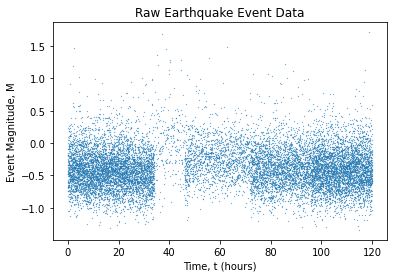

In [5]:
X, Y = [], []

for line in open('M_data.txt', 'r'):
  values = [float(s) for s in line.split()]
  X.append(values[0])
  Y.append(values[1])

plt.plot(X, Y, '.', markersize = 0.5)
plt.title("Raw Earthquake Event Data")
plt.xlabel("Time, t (hours)")
plt.ylabel("Event Magnitude, M")
plt.show()

## Analyzing data between 0 to 34 hours

   Magnitude, M  Number of Earthquake, N with Magnitude > M 
0          0.00                                        464.0
1          0.25                                        140.0
2          0.50                                         45.0
3          0.75                                         17.0
4          1.00                                          4.0
5          1.25                                          1.0
6          1.50                                          0.0
N = [[464]
 [140]
 [ 45]
 [ 17]
 [  4]
 [  1]]
M = [[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]
 [1.25]]
log10_N = [[2.66651798]
 [2.14612804]
 [1.65321251]
 [1.23044892]
 [0.60205999]
 [0.        ]]
Z = [[1.   0.  ]
 [1.   0.25]
 [1.   0.5 ]
 [1.   0.75]
 [1.   1.  ]
 [1.   1.25]]


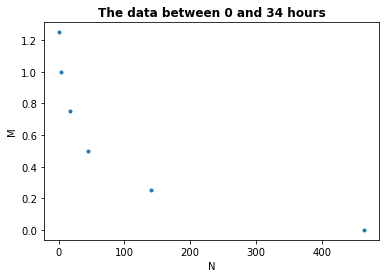

In [6]:
# iniatiate N iteration at each selected earthquake magnitude, M
N_M_0 = 0
N_M_1quarter = 0
N_M_1half = 0
N_M_3quarter = 0
N_M_1 = 0
N_M_1_1quarter = 0
N_M_1_1half = 0

# begin loop to pick time approximately between 34 and 46 hours    
for line in range(0,5297):

    # calculate N at each selected earth magnitude, M
    if Y[line] >= 0:
        N_M_0 += 1  
    
    if Y[line] >= 0.25:
        N_M_1quarter += 1  
        
    if Y[line] >= 0.5:
        N_M_1half += 1
        
    if Y[line] >= 0.75:
        N_M_3quarter += 1
        
    if Y[line] >= 1:
        N_M_1 += 1  
        
    if Y[line] >= 1.25:
        N_M_1_1quarter += 1
        
    if Y[line] >= 1.5:
        N_M_1_1half += 1 

# create table of M and N
table = pd.DataFrame(np.array([[0, N_M_0],[0.25, N_M_1quarter],[0.5, N_M_1half],[0.75, N_M_3quarter],[1, N_M_1],[1.25, N_M_1_1quarter],[1.5, N_M_1_1half]]),columns=['Magnitude, M', 'Number of Earthquake, N with Magnitude > M '])

# form a column vector for N
N = np.array([[N_M_0],[N_M_1quarter],[N_M_1half],[N_M_3quarter],[N_M_1],[N_M_1_1quarter]])

# form a column vector for y values following the equation linearization (log10 N)
log10_N = np.log10(N)

# form a column vector for M
M = np.array([[0],[0.25],[0.5],[0.75],[1.0],[1.25]])

# form a [Z] matrix
Z = np.insert(M, 0, 1, axis=1)

print(table)
print('N =', N)
print('M =', M)
print('log10_N =', log10_N)
print('Z =', Z)

# plot M vs. N
plt.plot(N, M, '.')
plt.title('The data between 0 and 34 hours', fontweight = 'bold')
plt.xlabel('N')
plt.ylabel('M');

In [7]:
regression = multi_regress(log10_N, Z) # use regression function to find best fit model for the data

print('a =', regression[0]) # show the column vector containing the model coefficients
print('r =', regression[1]) # show the column vector of residuals between the model and the data at each data point
print('r^2 =', regression[2]) # show the coefficient of determination

print('a =', regression[0][0][0]) # show value of constant a
print('b =', -regression[0][1][0]) # show value of constant b

a = [[ 2.69645821]
 [-2.10143516]]
r = [[-0.02994023]
 [-0.02497139]
 [ 0.00747188]
 [ 0.11006708]
 [ 0.00703693]
 [-0.06966427]]
r^2 = 0.9961652625742853
a = 2.696458213896901
b = 2.10143515751112


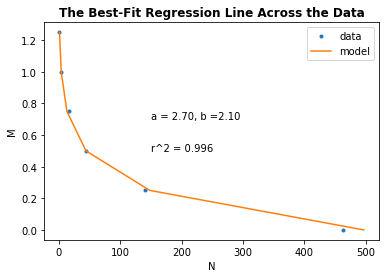

In [8]:
# plot best-fit curve along the data
plt.figure()
plt.plot(N, M, '.', label = 'data')
plt.plot(10 ** (regression[0][0] + regression[0][1] * M), M, label = 'model')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('The Best-Fit Regression Line Across the Data', fontweight = 'bold')
plt.xlabel('N')
plt.ylabel('M')
plt.text(150, 0.7, "a = " + str("{:.2f}".format(regression[0][0][0])) + ", b =" + str("{:.2f}".format(-regression[0][1][0])))
plt.text(150, 0.5, "r^2 = " + str("{:.3f}".format(regression[2])));

## Analyzing data between 34 and 46 hours

   Magnitude, M  Number of Earthquake, N with Magnitude > M 
0          0.00                                        114.0
1          0.25                                         59.0
2          0.50                                         25.0
3          0.75                                         13.0
4          1.00                                         10.0
5          1.25                                          6.0
6          1.50                                          1.0
N = [[114]
 [ 59]
 [ 25]
 [ 13]
 [ 10]
 [  6]
 [  1]]
M = [[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]]
log10_N = [[2.05690485]
 [1.77085201]
 [1.39794001]
 [1.11394335]
 [1.        ]
 [0.77815125]
 [0.        ]]
Z = [[1.   0.  ]
 [1.   0.25]
 [1.   0.5 ]
 [1.   0.75]
 [1.   1.  ]
 [1.   1.25]
 [1.   1.5 ]]


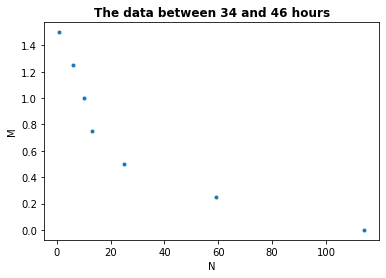

In [9]:
# iniatiate N iteration at each selected earthquake magnitude, M
N_M_0 = 0
N_M_1quarter = 0
N_M_1half = 0
N_M_3quarter = 0
N_M_1 = 0
N_M_1_1quarter = 0
N_M_1_1half = 0

# begin loop to pick time approximately between 34 and 46 hours    
for line in range(5298,5531):

    # calculate N at each selected earth magnitude, M
    if Y[line] >= 0:
        N_M_0 += 1  
    
    if Y[line] >= 0.25:
        N_M_1quarter += 1  
        
    if Y[line] >= 0.5:
        N_M_1half += 1
        
    if Y[line] >= 0.75:
        N_M_3quarter += 1
        
    if Y[line] >= 1:
        N_M_1 += 1  
        
    if Y[line] >= 1.25:
        N_M_1_1quarter += 1
        
    if Y[line] >= 1.5:
        N_M_1_1half += 1 

# create table of M and N
table = pd.DataFrame(np.array([[0, N_M_0],[0.25, N_M_1quarter],[0.5, N_M_1half],[0.75, N_M_3quarter],[1, N_M_1],[1.25, N_M_1_1quarter],[1.5, N_M_1_1half]]),columns=['Magnitude, M', 'Number of Earthquake, N with Magnitude > M '])

# form a column vector for N
N = np.array([[N_M_0],[N_M_1quarter],[N_M_1half],[N_M_3quarter],[N_M_1],[N_M_1_1quarter],[N_M_1_1half]])

# form a column vector for y values following the equation linearization (log10 N)
log10_N = np.log10(N)

# form a column vector for M
M = np.array([[0],[0.25],[0.5],[0.75],[1.0],[1.25],[1.5]])

# form a [Z] matrix
Z = np.insert(M, 0, 1, axis=1)

print(table)
print('N =', N)
print('M =', M)
print('log10_N =', log10_N)
print('Z =', Z)

# plot M vs. N
plt.plot(N, M, '.')
plt.title('The data between 34 and 46 hours', fontweight = 'bold')
plt.xlabel('N')
plt.ylabel('M');

In [10]:
regression = multi_regress(log10_N, Z) # use regression function to find best fit model for the data

print('a =', regression[0]) # show the column vector containing the model coefficients
print('r =', regression[1]) # show the column vector of residuals between the model and the data at each data point
print('r^2 =', regression[2]) # show the coefficient of determination

print('a =', regression[0][0][0]) # show value of constant a
print('b =', -regression[0][1][0]) # show value of constant b

a = [[ 2.07619051]
 [-1.22200801]]
r = [[-1.92856541e-02]
 [ 1.63509222e-04]
 [-6.72464907e-02]
 [-4.57411440e-02]
 [ 1.45817507e-01]
 [ 2.29470760e-01]
 [-2.43178487e-01]]
r^2 = 0.9491372202268196
a = 2.076190505462854
b = 1.2220080121712082


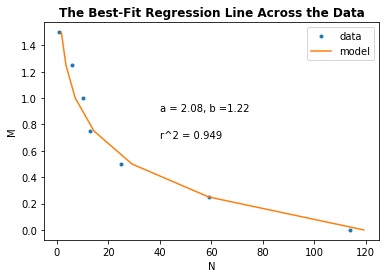

In [11]:
# plot best-fit curve along the data
plt.figure()
plt.plot(N, M, '.', label = 'data')
plt.plot(10 ** (regression[0][0] + regression[0][1] * M), M, label = 'model')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('The Best-Fit Regression Line Across the Data', fontweight = 'bold')
plt.xlabel('N')
plt.ylabel('M')
plt.text(40, 0.9, "a = " + str("{:.2f}".format(regression[0][0][0])) + ", b =" + str("{:.2f}".format(-regression[0][1][0])))
plt.text(40, 0.7, "r^2 = " + str("{:.3f}".format(regression[2])));

## Analyzing data between 46 and 72 hours

   Magnitude, M  Number of Earthquake, N with Magnitude > M 
0          0.00                                        282.0
1          0.25                                         71.0
2          0.50                                         27.0
3          0.75                                         12.0
4          1.00                                          3.0
5          1.25                                          2.0
6          1.50                                          0.0
N = [[282]
 [ 71]
 [ 27]
 [ 12]
 [  3]
 [  2]]
M = [[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]
 [1.25]]
log10_N = [[2.45024911]
 [1.85125835]
 [1.43136376]
 [1.07918125]
 [0.47712125]
 [0.30103   ]]
Z = [[1.   0.  ]
 [1.   0.25]
 [1.   0.5 ]
 [1.   0.75]
 [1.   1.  ]
 [1.   1.25]]


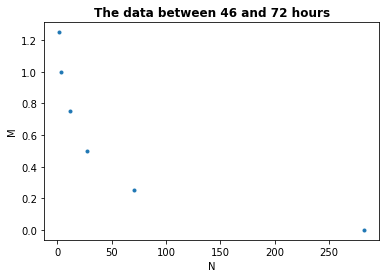

In [12]:
# iniatiate N iteration at each selected earthquake magnitude, M
N_M_0 = 0
N_M_1quarter = 0
N_M_1half = 0
N_M_3quarter = 0
N_M_1 = 0
N_M_1_1quarter = 0
N_M_1_1half = 0

# begin loop to pick time approximately between 34 and 46 hours    
for line in range(5532,6973):

    # calculate N at each selected earth magnitude, M
    if Y[line] >= 0:
        N_M_0 += 1  
    
    if Y[line] >= 0.25:
        N_M_1quarter += 1  
        
    if Y[line] >= 0.5:
        N_M_1half += 1
        
    if Y[line] >= 0.75:
        N_M_3quarter += 1
        
    if Y[line] >= 1:
        N_M_1 += 1  
        
    if Y[line] >= 1.25:
        N_M_1_1quarter += 1
        
    if Y[line] >= 1.5:
        N_M_1_1half += 1 

# create table of M and N
table = pd.DataFrame(np.array([[0, N_M_0],[0.25, N_M_1quarter],[0.5, N_M_1half],[0.75, N_M_3quarter],[1, N_M_1],[1.25, N_M_1_1quarter],[1.5, N_M_1_1half]]),columns=['Magnitude, M', 'Number of Earthquake, N with Magnitude > M '])

# form a column vector for N
N = np.array([[N_M_0],[N_M_1quarter],[N_M_1half],[N_M_3quarter],[N_M_1],[N_M_1_1quarter]])

# form a column vector for y values following the equation linearization (log10 N)
log10_N = np.log10(N)

# form a column vector for M
M = np.array([[0],[0.25],[0.5],[0.75],[1.0],[1.25]])

# form a [Z] matrix
Z = np.insert(M, 0, 1, axis=1)

print(table)
print('N =', N)
print('M =', M)
print('log10_N =', log10_N)
print('Z =', Z)

# plot M vs. N
plt.plot(N, M, '.')
plt.title('The data between 46 and 72 hours', fontweight = 'bold')
plt.xlabel('N')
plt.ylabel('M');

In [13]:
regression = multi_regress(log10_N, Z) # use regression function to find best fit model for the data

print('a =', regression[0]) # show the column vector containing the model coefficients
print('r =', regression[1]) # show the column vector of residuals between the model and the data at each data point
print('r^2 =', regression[2]) # show the coefficient of determination

print('a =', regression[0][0][0]) # show value of constant a
print('b =', -regression[0][1][0]) # show value of constant b

a = [[ 2.35222605]
 [-1.73950736]]
r = [[ 0.09802306]
 [-0.06609086]
 [-0.05110861]
 [ 0.03158571]
 [-0.13559744]
 [ 0.12318814]]
r^2 = 0.9847805258174542
a = 2.3522260503228662
b = 1.7395073558156007


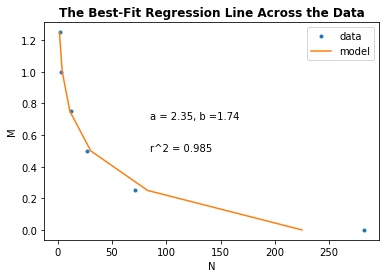

In [14]:
# plot best-fit curve along the data
plt.figure()
plt.plot(N, M, '.', label = 'data')
plt.plot(10 ** (regression[0][0] + regression[0][1] * M), M, label = 'model')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('The Best-Fit Regression Line Across the Data', fontweight = 'bold')
plt.xlabel('N')
plt.ylabel('M')
plt.text(85, 0.7, "a = " + str("{:.2f}".format(regression[0][0][0])) + ", b =" + str("{:.2f}".format(-regression[0][1][0])))
plt.text(85, 0.5, "r^2 = " + str("{:.3f}".format(regression[2])));

## Analyzing data between 72 and 120 hours

   Magnitude, M  Number of Earthquake, N with Magnitude > M 
0          0.00                                        641.0
1          0.25                                        180.0
2          0.50                                         56.0
3          0.75                                         21.0
4          1.00                                          8.0
5          1.25                                          1.0
6          1.50                                          1.0
N = [[641]
 [180]
 [ 56]
 [ 21]
 [  8]
 [  1]
 [  1]]
M = [[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]]
log10_N = [[2.80685803]
 [2.25527251]
 [1.74818803]
 [1.32221929]
 [0.90308999]
 [0.        ]
 [0.        ]]
Z = [[1.   0.  ]
 [1.   0.25]
 [1.   0.5 ]
 [1.   0.75]
 [1.   1.  ]
 [1.   1.25]
 [1.   1.5 ]]


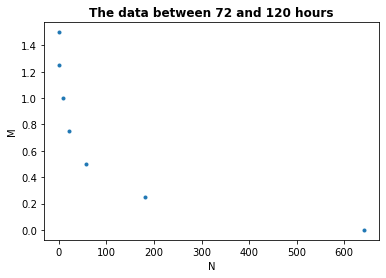

In [15]:
# iniatiate N iteration at each selected earthquake magnitude, M
N_M_0 = 0
N_M_1quarter = 0
N_M_1half = 0
N_M_3quarter = 0
N_M_1 = 0
N_M_1_1quarter = 0
N_M_1_1half = 0

# begin loop to pick time approximately between 34 and 46 hours    
for line in range(6974,13390):

    # calculate N at each selected earth magnitude, M
    if Y[line] >= 0:
        N_M_0 += 1  
    
    if Y[line] >= 0.25:
        N_M_1quarter += 1  
        
    if Y[line] >= 0.5:
        N_M_1half += 1
        
    if Y[line] >= 0.75:
        N_M_3quarter += 1
        
    if Y[line] >= 1:
        N_M_1 += 1  
        
    if Y[line] >= 1.25:
        N_M_1_1quarter += 1
        
    if Y[line] >= 1.5:
        N_M_1_1half += 1 

# create table of M and N
table = pd.DataFrame(np.array([[0, N_M_0],[0.25, N_M_1quarter],[0.5, N_M_1half],[0.75, N_M_3quarter],[1, N_M_1],[1.25, N_M_1_1quarter],[1.5, N_M_1_1half]]),columns=['Magnitude, M', 'Number of Earthquake, N with Magnitude > M '])

# form a column vector for N
N = np.array([[N_M_0],[N_M_1quarter],[N_M_1half],[N_M_3quarter],[N_M_1],[N_M_1_1quarter],[N_M_1_1half]])

# form a column vector for y values following the equation linearization (log10 N)
log10_N = np.log10(N)

# form a column vector for M
M = np.array([[0],[0.25],[0.5],[0.75],[1.0],[1.25],[1.5]])

# form a [Z] matrix
Z = np.insert(M, 0, 1, axis=1)

print(table)
print('N =', N)
print('M =', M)
print('log10_N =', log10_N)
print('Z =', Z)

# plot M vs. N
plt.plot(N, M, '.')
plt.title('The data between 72 and 120 hours', fontweight = 'bold')
plt.xlabel('N')
plt.ylabel('M');

In [16]:
regression = multi_regress(log10_N, Z) # use regression function to find best fit model for the data

print('a =', regression[0]) # show the column vector containing the model coefficients
print('r =', regression[1]) # show the column vector of residuals between the model and the data at each data point
print('r^2 =', regression[2]) # show the coefficient of determination

print('a =', regression[0][0][0]) # show value of constant a
print('b =', -regression[0][1][0]) # show value of constant b

a = [[ 2.76682724]
 [-1.96803102]]
r = [[ 0.04003079]
 [-0.01954698]
 [-0.03462371]
 [ 0.03141532]
 [ 0.10429376]
 [-0.30678847]
 [ 0.18521929]]
r^2 = 0.979271363821394
a = 2.7668272424910256
b = 1.9680310198253315


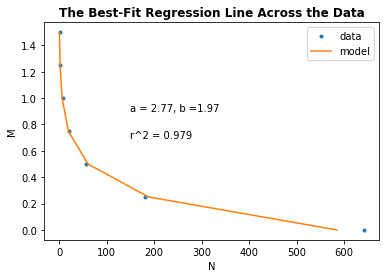

In [17]:
# plot best-fit curve along the data
plt.figure()
plt.plot(N, M, '.', label = 'data')
plt.plot(10 ** (regression[0][0] + regression[0][1] * M), M, label = 'model')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('The Best-Fit Regression Line Across the Data', fontweight = 'bold')
plt.xlabel('N')
plt.ylabel('M')
plt.text(150, 0.9, "a = " + str("{:.2f}".format(regression[0][0][0])) + ", b =" + str("{:.2f}".format(-regression[0][1][0])))
plt.text(150, 0.7, "r^2 = " + str("{:.3f}".format(regression[2])));

The intervals to plot M vs N where chosen based-upon observable trends in the data. For example there appears to be ~4 total different phases of earthquake occurences in the data. The first and last phases look remarkably similar in density of occurences while the second phase interval has relatively very few Earthquakes occuring. The 2nd and 3rd intervals look to gradually build up in occurences of Earthquakes before reaching the 4th interval which again has a high relative amount of earthquake occurences. 

The coefficient of determination for all intervals are greater than 0.6 indicating that the models were a good fit to the data in each interval.

Significant trends can be seen in how the b parameter changed over time. If it is assumed that this data was recorded at this site in a region experiencing induced seismicity due to industrial activities (e.g.hydraulic fracturing or wastewater injection). Then in agreement with **(Leptokaropoulos 2019)**, it appears that there could be a statistically signifcant direct relation between b values and injection rate changes. The b values appear to be related to the slope of injection rate **where large injection rate increases correspond to high b values and low injection rate slope values correspond to lower b values**. Something else to consider is a detection bias between the extremly low valued earthquakes and their frequency of occurence. If extremely low-valued earthquakes are difficult to detect due to the capabilities of instruments measuring them, then this could lead to a lower number of these events recorded in the data. 

## Conclusion

As illustrated in this lab, the **Linear Least Squares Regression** method can be an effective way of solving a linear system of equations. In our study an application of it was applied to analyze the Gutenberg-Richter law in monitoring Earthquake frequency at an industrial operation injecting fluid into a shale formation. By manipulating the law into a linearized model (by taking the logarithm of both sides in equation 1), the system was solved at different intervals, and then de-linearized (returned back to the  normal form of equation 1). Best fit curves were also then plotted. From analyzing the data it appears that large injection rate increases correspond to high b values and lower injection slope values correspond to lower b values and this could explain noticable trends in the dataset. The intervals that were analyzed were chosen based-upon distinguishable trends in the number of earthquake occurances in the data. Approximately 4 different intervals could be distinguished.

## References

1) Sharp, M. (2021) University of Calgary Teaching Assistant. Computational Methods for Geophysicists Winter. 2021


2) Karchewski, B (2021) Topic 04 - Curve Fitting I - Least Squares Regression - Lecture, University of Calgary https://d2l.ucalgary.ca/d2l/le/content/356381/viewContent/4431315/View


3) Leptokaropoulos, Staszek (2019) Temporal response of magnitude distribution to fuid injection rates in The Geysers geothermal field. Acta Geophysica. 67:327–339 https://doi.org/10.1007/s11600-018-0215-1

4) Pictures used in this lab can be found at their url's embedded in the code!